# Question 2
#### Author: Michal Kubina

#### 0. imports

In [1]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
import plotly.graph_objects as go
import math

First I will look at the data set and choose two relevant shows which I know (at least a little) with enough data entries:

In [2]:
data = pd.read_pickle("discussions.p")  #read discussions pickle file
display(data.title.value_counts()) #look at the different tv shows and number of entries
ref = pd.read_pickle("word_cats.p") #read word_cats file

Game of Thrones            15462
Breaking Bad                6424
Better Call Saul            5268
Black Mirror                4720
Stranger Things             2891
True Detective              2721
Twin Peaks                  2399
Dark                        2004
Ozark                       1417
Mr. Robot                   1347
Orange is the New Black     1208
The Witcher                 1188
Fargo                        680
Mindhunter                   657
The Newsroom                 484
Succession                   389
The Crown                    338
House of Cards               158
La Casa de Papel             150
The Mandelorian               95
Name: title, dtype: int64

#### 1. Relevance of comparison and hypothesis

For my comparison I will choose two shows, Better Call Saul and Orange Is the New Black. These shows have something in common but simultaneously are extremes in a kind.

Better Call Saul is full of men characters such as Saul Goodmann, Gustavo Fring, Lalo Salamanca, Chuck, Mike, Nacho, etc. From my point of view, the only visible and lead main woman character is Kim Wexler. 

Contrary, Orange is the New Black is full of women such as Alex, Tifanny, Poussey, Suzanne, Nicky, and Piper. However, I suppose two male characters can be considered important to the show. These are Larry Bloom and Sam Healy. 

Thus, I believe that the first show itself is more about men and the second show is more about women. Thus, I would suggest that this trend could be seen in data in a way that people on Reddit will be discussing the specific characters a lot and this would lead to gender bias.

Hypothesis:

The composition of gender across actors and actresses of a show is also reflected in discussions on Reddit. To be specific in a show full of men (better caul saul) the discussion should be biased to men because they are a big part of a show. On the other hand in a show full of women (orange is the new black) the comments should be rather biased to women. 

Here I will look at the years of discussion to be able to tell about which series the people are writing:

In [3]:
print("Better Call Saul")
print("Year of first message: ")
print(data[data.title == "Better Call Saul"].year.min())
print("Year of last message: ")
print(data[data.title == "Better Call Saul"].year.max())
print("-----------")
print("Orange is the New Black")
print("Year of first message: ")
print(data[data.title == "Orange is the New Black"].year.min())
print("Year of last message: ")
print(data[data.title == "Orange is the New Black"].year.max())

Better Call Saul
Year of first message: 
2016
Year of last message: 
2020
-----------
Orange is the New Black
Year of first message: 
2013
Year of last message: 
2016


#### 2. processing

Here I will define functions which I will use later:

In [4]:
def tokenize(text):
    """
    Returns splitted string without tokens

    Parameters
    ----------
    text : string
    
    Returns
    ------- 
    array of strings
    """
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' #list of all punctuations
    for punctuation in punctuations: #loop through it
        text = text.replace(punctuation, '') #replace it
    text = text.lower() #lower case text
    text = text.split() # split the text on spaces
    return text #return list

def tokenize_wrapper(data, wanted):
    """
    Returns tokenized text. Wrapper to filter data.

    Parameters
    ----------
    data : pandas dataframe
        holds all data
    
    wanted : string
        string of wanted title
        
    Returns
    -------   
    list of tokenized text
    """
    texts = data[data.title == wanted].post.values #filter dataframe
    tokenized_texts = [tokenize(text) for text in texts] #tokenize function
    return tokenized_texts #return tokenized texts

def train_word2vec(dims, tokenized_texts):
    """
    Trains word embedding model.

    Parameters
    ----------
    dims : int
        number of vector dimensions
    
    tokenized_texts : string
        list of tokenized text
    
    Returns
    -------
    word2vec model
    """
    SIZE = dims # dimensions of the embeddings
    SG = 1 # whether to use skip-gram or CBOW I use skipgram
    WINDOW = 10 # the window size
    N_WORKERS = 8 #set number of worker
    MIN_COUNT = 5 #minimal count of words

    model = Word2Vec(size=SIZE,
                    sg=SG,
                    window=WINDOW, 
                    min_count=MIN_COUNT,
                    workers=N_WORKERS) #initialize model
    model.build_vocab(tokenized_texts) #building vocabulary
    model.train(tokenized_texts,
               total_examples=model.corpus_count,
               epochs=model.epochs) #train a model
    return model #return a model

def visualize_categories(cats, dat1, dat2):
    """
    Returns the figure where mean of biases of two shows is visualised

    Parameters
    ----------
    categories : list
        list of categories of bias
    dat1 : list
        list of mean biases show1 
    dat2 : 
        list of mean biases of show2
        
    Returns
    -------
    plotly figure
    """
    fig = go.Figure(data=[
    go.Bar(name='Better Call Saul', x=cats, y=dat1),
    go.Bar(name='Orange is the New Black', x=cats, y=dat2)
    ]) #set up a figure
    fig.update_layout(barmode='group', title_text = 'Bias across categories: positive - bias to women, negative - bias to men') #update layout to groups
    return fig #return fig

Below I will tokenize the text firstly in a way that I will remove punctuations and lower all words. I will not do lemmatization or removal of stopwords because I could lose some of the meaning with these procedures. Then I will train word2vec model.

In [17]:
tokenized_texts_bcs = tokenize_wrapper(data, "Better Call Saul") #create tokenized text for better caul saul
model_bcs = train_word2vec(250, tokenized_texts_bcs) #train the model

tokenized_texts_ob = tokenize_wrapper(data, "Orange is the New Black") #create tokenized text for orange is the new black show
model_ob = train_word2vec(250, tokenized_texts_ob) #train the model

To check if the models make sense I will look at the similar words and it was also used for altering number of dimensions of a vector:

In [18]:
print(model_ob.wv.most_similar('alex')[:4])
print(model_ob.wv.most_similar('man')[:4])
print(model_ob.wv.most_similar('woman')[:4])

[('stella', 0.9992452263832092), ('piper', 0.9989538788795471), ('shes', 0.9988996386528015), ('just', 0.9988816976547241)]
[('gun', 0.9997701048851013), ('obviously', 0.9997637271881104), ('attention', 0.9997346997261047), ('cesar', 0.9997286796569824)]
[('instead', 0.9997596740722656), ('asshole', 0.9997569918632507), ('hand', 0.9997562766075134), ('asian', 0.9997510313987732)]


In [19]:
print(model_bcs.wv.most_similar('kim')[:4])
print(model_bcs.wv.most_similar('ernesto')[:4])
print(model_bcs.wv.most_similar('attorney')[:4])

[('kims', 0.8679035902023315), ('mesa', 0.865774393081665), ('her', 0.848949134349823), ('verde', 0.8364549279212952)]
[('hence', 0.9881959557533264), ('cares', 0.9866722822189331), ('jealous', 0.986360490322113), ('alone', 0.9861384034156799)]
[('causes', 0.989560067653656), ('successful', 0.9893897771835327), ('vs', 0.9880961179733276), ('fighting', 0.9880233407020569)]


Here I will try to find male and female words for show better call saul and orange is the new black. I will construct the list in a way that I will try to include the words which have a significant meaning to the shows. Moreover, I will include the first names of the characters, because this might be very important for my hypothesis.

In [20]:
bcs = {} #creating dic for better caul saul
bcs["m"] = ["he", "his", "male", "father", "grandfather", "boy", "husband",
            "man", "men", "son", "nephew", "saul", "gustavo", "mike", "goodman", "lawyer", "salamanca", "lalo", "nacho", "varga", "attorney"]
bcs["f"] = ["she", "her", "female", "mother", "grandmother","girl", "pregnant",
            "wife", "menstruation", "femininity", "women", "woman", "daughter", "niece",
            "kim", "wexler", "lady"]


ob = {} #creating dic for orange is the new black
ob["m"] = ["he", "his", "male", "father", "grandfather", "boy", "husband",
            "man", "men", "son", "nephew", "larry", "sam"]
ob["f"] = ["she", "her", "female", "mother", "grandmother","girl", "pregnant",
            "wife", "menstruation", "femininity", "women", "woman", "daughter",
            "niece", "lesbian", "alex", "tifanny", "poussey", "suzanne", "nicky", "piper"]

In [21]:
def get_embeddings(dic, model):
    """
    Returns splitted string without tokens

    Parameters
    ----------
    dic : dictionary
        dic of lists 
    model : word2vec model
        trained model
        
    Returns
    ------- 
    mean embeddings for men and female
    """
    words = [word for word in dic["m"] if word in model.wv.vocab] # checks if word is in vocabulary (i.e. has been seen by the model before)
    mean_m = np.mean([model.wv[word] for word in words], axis=0) #get mean
    words = [word for word in dic["f"] if word in model.wv.vocab] # checks if word is in vocabulary (i.e. has been seen by the model before)
    mean_f = np.mean([model.wv[word] for word in words], axis=0) #get mean
    return mean_m, mean_f


In [22]:
embedding_m_bcs, embedding_f_bcs = get_embeddings(bcs, model_bcs) #get embeddings for better call sauol
embedding_m_ob, embedding_f_ob = get_embeddings(ob, model_ob) #get embeddings for orange is the new black

In [23]:
def get_bias(embedding_m, embedding_f, model, ref):
    """
    Returns dictionary of pd series with values of biases

    Parameters
    ----------
    embedding_m : string
        embedding vector for men
    
    embedding_f : string
        embedding vector for female
        
    model : word2vec model
        trained model
        
    ref : pandas dataframe
        pandas dataframe of words with categories
    Returns
    ------- 
    dictionary of pd series
    """
    li = list() #initialize list
    dic_main = {} #init dictionary
    for col in ref.columns: #for loop across categories
        dic_local = {} #init local dictionary 
        for word in ref[col].values: #for loop across the words
            if word in model.wv.vocab: #check if the word is in vocabulary
                frob_m = np.linalg.norm(np.subtract(model.wv[word], embedding_m)) #get frobenius distance to male embedding vector
                frob_f = np.linalg.norm(np.subtract(model.wv[word], embedding_f)) #get frobenius distance to female embedding vector
                dic_local[word] = frob_m - frob_f #get bias
        d = pd.Series(dic_local) #dic to pd series
        #display(d.sort_values())
        #print("-----")
        dic_main[col] = d #add results to main dic
    return dic_main #return main dic

In [24]:
dic_bcs = get_bias(embedding_m_bcs, embedding_f_bcs, model_bcs, ref) #get biases
dic_ob = get_bias(embedding_m_ob, embedding_f_ob, model_ob, ref) #get biases
def get_df_from_dics(dic1, dic2):
    """
    Concatenates results and returns daframe with statistical measures

    Parameters
    ----------
    dic1 : dictionary
        dic with pd series
    
    dic2 : dictionary
        dic with pd series
        
    Returns
    ------- 
    pandas dataframe
    """
    main = {} #init dic
    std = {} #init dic
    for key in dic1: #loop through keys to get the right pd series
        main[key] = dic1[key].mean() #get mean of pd series
        std[key] = dic1[key].std() #get std of pd series
    res1 = pd.Series(main) #convert dic to pd series
    res3 = pd.Series(std) #convert dic to pd series----> below  it is similar so I will leave out the comments
    main = {}
    std = {}
    for key in dic2:
        main[key] = dic2[key].mean()
        std[key] = dic2[key].std()
    res2 = pd.Series(main)
    res4 = pd.Series(std)
    return pd.concat([res1,res3, res2, res4],axis=1)
result = get_df_from_dics(dic_bcs, dic_ob) #get statistics dataframe
result.columns = ["Better Call Saul mean", "Better Call Saul std", "Orange is the New Black mean", "Orange is the New Black std"] #rename columns
display(result) #display the frame
mean_bcs = result.iloc[:, 0].mean() #compute mean
mean_ob = result.iloc[:, 2].mean() #compute std
std_bcs = result.iloc[:, 0].std()
std_ob = result.iloc[:, 0].std()

,Better Call Saul mean,Better Call Saul std,Orange is the New Black mean,Orange is the New Black std
affect,-0.075512,0.084259,0.008356,0.015092
posemo,-0.081487,0.080910,0.009078,0.016343
negemo,-0.072258,0.084982,0.007605,0.013796
social,-0.062893,0.142234,-0.002076,0.023833
family,-0.106688,0.128468,-0.000525,0.016442
cogproc,-0.084940,0.080842,0.002642,0.017584
percept,-0.081784,0.081722,0.007677,0.012870
body,-0.065811,0.072434,0.004728,0.013485
work,-0.037275,0.133333,-0.000765,0.010698
leisure,-0.085612,0.065342,0.000255,0.005843


#### 3. summary

From significance point of view, I will do two tailed t independent set test. Resource: https://opentextbc.ca/researchmethods/chapter/some-basic-null-hypothesis-tests/

null hypothesis - means are same

alternative hypothesis - means are different

In [25]:
t = (mean_bcs - mean_ob)/math.sqrt(std_bcs*std_bcs/13 + std_ob*std_ob/13)
t

-9.87504223624614

Looking at the t table with n - 2 degrees of freedom we can see that we cannot reject the null hypohesis. Thus, the result is not statistically significant. However, I believe that trend is obvious (can be seen later in the plot)

In [46]:
print("The mean of bias across categories in Better Call Saul discussions is: " + str(mean_bcs))
print("The standard deviation of bias across categories in Better Call Saul discussions is: " + str(std_bcs))
print("The mean of bias across categories in Orange is the New Black discussions is: " + str(mean_ob))
print("The standard deviation of bias across categories in Orange is the New Black discussions is: " + str(std_ob))

The mean of bias across categories in Better Call Saul discussions is: -0.07557366217624434
The standard deviation of bias across categories in Better Call Saul discussions is: 0.02044089354733074
The mean of bias across categories in Orange is the New Black discussions is: 0.003600260021309606
The standard deviation of bias across categories in Orange is the New Black discussions is: 0.02044089354733074


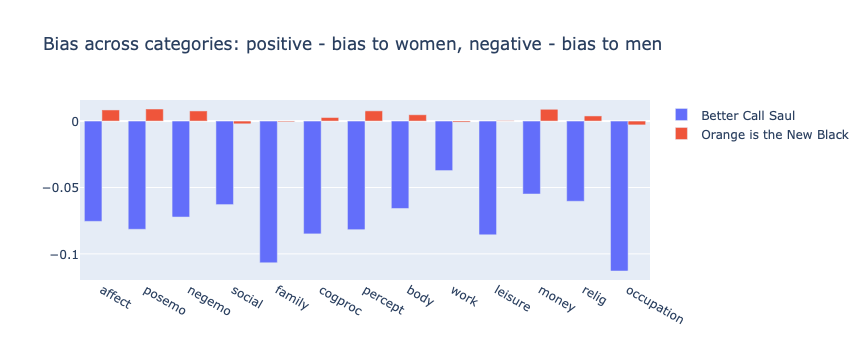

In [27]:
visualize_categories(result.index, result.iloc[:, 0].values, result.iloc[:, 2].values) #visualize categories

Firstly, let me start with the total mean across the categories. The mean of bias for the Better Call Saul discussions is -0.07 - negative - and on the other hand, the mean for Orange is the New Black discussions is 0.003. This supports my hypothesis that the Better Call Saul show consists primarily of male actors and thus the discussion is biased towards men. Contrary, Orange is the New Black show consists of female actors, thus the discussion is biased more towards women. There is an expected difference between the shows, however, I would expect the show Orange is the New Black reddit discussion to be biased more towards women than it is. Now we can see just a slight positive bias towards women. I think this could be explained by the distribution of Reddit users which are mostly males and thus, they could focus more on males. Moreover, in this show, if I remember correctly, there was a huge problem with some men e.g. Larry, so the users might emphasize this issue in discussions, and thus, the bias is not that big as expected. To sum up, even though my results are not statistically significant I believe that I can confirm that the discussion reflects the distribution of actors in the show. When looking at the categories itself I found two interesting categories: positive emotions and affect.

Note:
It seems that in the discussions about Better Call Saul show words such as smart, intilligent are biased towards men and words such as support, loves are biased towards women. On the other hand, words such as love, happy are biased more towards women in discussion in Orange is the New Black subreddit and words such as okay, cut good are biased towards men. Similar thing can be found with affect and other categories. I would call this effect characterizing gender in a good light -> in better call Saul the men and the women in Orange is the New Black.

In [47]:
print(dic_ob["posemo"].sort_values().tail())
print(dic_ob["posemo"].sort_values().head())
print(dic_bcs["posemo"].sort_values().tail())
print(dic_bcs["posemo"].sort_values().head())

love           0.033701
definitely     0.034613
loved          0.035648
interesting    0.036486
happy          0.036645
dtype: float64
care        -0.034803
good        -0.026816
better      -0.017150
okay        -0.014721
important   -0.013015
dtype: float64
perfect    0.085396
truth      0.101027
accept     0.105477
loves      0.128891
support    0.189420
dtype: float64
smart         -0.301749
intelligent   -0.283133
well          -0.271228
definitely    -0.229053
cool          -0.224262
dtype: float64


In [48]:
print(dic_ob["affect"].sort_values().tail())
print(dic_ob["affect"].sort_values().head())
print(dic_bcs["affect"].sort_values().tail())
print(dic_bcs["affect"].sort_values().head())

loved          0.035648
bad            0.036084
interesting    0.036486
happy          0.036645
crazy          0.040636
dtype: float64
care     -0.034803
good     -0.026816
cut      -0.021022
better   -0.017150
okay     -0.014721
dtype: float64
lied       0.128724
loves      0.128891
willing    0.134978
wrong      0.148886
support    0.189420
dtype: float64
kill          -0.336551
smart         -0.301749
revenge       -0.287457
intelligent   -0.283133
well          -0.271228
dtype: float64
